In [2]:
import pandas as pd

In [4]:
sales = pd.read_csv("Data/clean_Sales_df")
v_crime = pd.read_csv("Data/clean_violent_crime")
p_crime = pd.read_csv("Data/clean_property_crime")
transportation = pd.read_csv("Data/clean_transport_df")
school = pd.read_csv("Data/clean_school_df")

In [22]:
model = pd.read_csv("Data/DecisionTree_RandomForest_model", index_col=0)
model.head()

,zipcode,sale_percent_change,latest_median_sale,value_change,viol_rate,prop_rate,education,transportation
0,1001,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,1002,1.0,0.0,1.0,0.0,0.0,1.0,1.0
2,1003,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,1005,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,1007,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [23]:
model = model.astype(int)

model.zipcode = model.zipcode.astype('str')

model['zipcode'] = model['zipcode'].apply(lambda x: x.zfill(5))

model.head()

,zipcode,sale_percent_change,latest_median_sale,value_change,viol_rate,prop_rate,education,transportation
0,01001,0,0,0,0,0,1,1
1,01002,1,0,1,0,0,1,1
2,01003,0,1,0,0,0,1,1
3,01005,0,0,0,0,0,1,1
4,01007,0,0,0,0,0,1,1


In [24]:
dataset = model.values
dataset

array([['01001', 0, 0, ..., 0, 1, 1],
       ['01002', 1, 0, ..., 0, 1, 1],
       ['01003', 0, 1, ..., 0, 1, 1],
       ...,
       ['99926', 1, 0, ..., 1, 0, 0],
       ['99927', 1, 0, ..., 1, 0, 0],
       ['99929', 1, 0, ..., 1, 0, 0]], dtype=object)

In [27]:
X = dataset[:,2:6]
X

array([[0, 0, 0, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       ...,
       [0, 1, 0, 1],
       [0, 1, 0, 1],
       [0, 1, 0, 1]], dtype=object)

In [28]:
Y = dataset[:,1]
Y

array([0, 1, 0, ..., 1, 1, 1], dtype=object)

In [29]:
from sklearn import preprocessing

In [30]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [31]:
X_scale

array([[0., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.]])

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(23077, 4) (4945, 4) (4946, 4) (23077,) (4945,) (4946,)


In [33]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [35]:
mod = Sequential([
    Dense(32, activation='relu', input_shape=(4,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [36]:
mod.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [37]:
hist = mod.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Train on 23077 samples, validate on 4945 samples
Epoch 1/100
23077/23077 [==============================] - 1s 36us/step - loss: 0.2111 - accuracy: 0.9241 - val_loss: 0.1184 - val_accuracy: 0.9207
Epoch 2/100
23077/23077 [==============================] - 1s 28us/step - loss: 0.0809 - accuracy: 0.9484 - val_loss: 0.0578 - val_accuracy: 0.9826
Epoch 3/100
23077/23077 [==============================] - 1s 35us/step - loss: 0.0404 - accuracy: 0.9912 - val_loss: 0.0296 - val_accuracy: 1.0000
Epoch 4/100
23077/23077 [==============================] - 1s 34us/step - loss: 0.0218 - accuracy: 1.0000 - val_loss: 0.0167 - val_accuracy: 1.0000
Epoch 5/100
23077/23077 [==============================] - 1s 36us/step - loss: 0.0130 - accuracy: 1.0000 - val_loss: 0.0105 - val_accuracy: 1.0000
Epoch 6/100
23077/23077 [==============================] - 1s 31us/step - loss: 0.0085 - accuracy: 1.0000 - val_loss: 0.0071 - val_accuracy: 1.0000
Epoch 7/100
23077/23077 [==============================] - 1s 3

Epoch 54/100
23077/23077 [==============================] - 1s 31us/step - loss: 2.1306e-04 - accuracy: 1.0000 - val_loss: 2.0149e-04 - val_accuracy: 1.0000
Epoch 55/100
23077/23077 [==============================] - 1s 31us/step - loss: 2.0792e-04 - accuracy: 1.0000 - val_loss: 1.9662e-04 - val_accuracy: 1.0000
Epoch 56/100
23077/23077 [==============================] - 1s 32us/step - loss: 2.0301e-04 - accuracy: 1.0000 - val_loss: 1.9195e-04 - val_accuracy: 1.0000
Epoch 57/100
23077/23077 [==============================] - 1s 32us/step - loss: 1.9829e-04 - accuracy: 1.0000 - val_loss: 1.8748e-04 - val_accuracy: 1.0000
Epoch 58/100
23077/23077 [==============================] - 1s 33us/step - loss: 1.9377e-04 - accuracy: 1.0000 - val_loss: 1.8319e-04 - val_accuracy: 1.0000
Epoch 59/100
23077/23077 [==============================] - 1s 32us/step - loss: 1.8944e-04 - accuracy: 1.0000 - val_loss: 1.7908e-04 - val_accuracy: 1.0000
Epoch 60/100
23077/23077 [==============================] 

In [38]:
mod.evaluate(X_test, Y_test)[1]

4946/4946 [==============================] - 0s 15us/step


1.0

In [39]:
import matplotlib.pyplot as plt

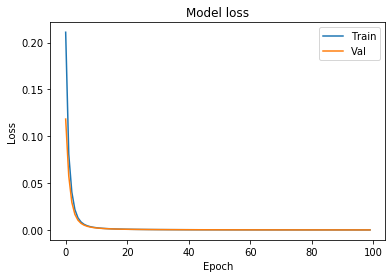

In [40]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

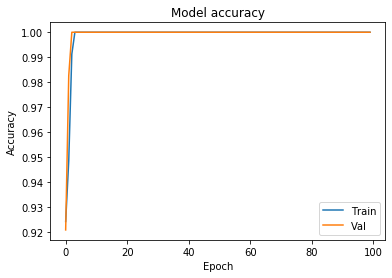

In [43]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()